# SpaceX Falcon 9 First-Stage Landing Analysis 

## Introduction
SpaceX's Falcon 9 rocket has revolutionized space travel with its reusable rocket technology, significantly reducing the cost of access to space. The Falcon 9 is a two-stage rocket, with the first-stage designed to return to Earth and be reused in subsequent missions. This first stage is equipped with landing legs and grid fins to control its descent and ensure a safe landing. This notebook aims to analyze the performance and outcomes of Falcon 9 first stage landings, focusing on various factors such as payload masses, boosters reused counts, and the impact of different orbits and launch sites.

## Dataset Description
The dataset used in this analysis contains detailed information about SpaceX Falcon 9 launches. The key columns in the dataset include:
- **FlightNumber**: The flight number of the Falcon 9 launch.
- **Date**: The date of the launch.
- **BoosterVersion**: The version of the Falcon 9 booster used.
- **PayloadMass**: The mass of the payload in kilograms.
- **Orbit**: The orbit in which the payload was deployed.
- **LaunchSite**: The site from which the launch took place.
- **Outcome**: The outcome of the first stage landing (e.g., success or failure).
- **Flights**: The number of flights the booster has completed.
- **GridFins**: Whether grid fins were used.
- **Reused**: Whether the booster was reused.
- **Legs**: Whether landing legs were used.
- **LandingPad**: The landing pad used for the booster recovery.
- **Block**: The block number of the booster.
- **ReusedCount**: The number of times the booster has been reused.
- **Serial**: The serial number of the booster.
- **Longitude**: The longitude of the launch site.
- **Latitude**: The latitude of the launch site.
- **Class**: The binary outcome of the first stage landing (1 for success, 0 for failure).

## Analysis Questions
1. **What is the success rate of Falcon 9 first-stage landings?**
2. **How does the payload mass affect the landing success?**
3. **Which launch sites have the highest success rates?**
4. **What is the trend of landing success over time?**
5. **Does the number of previous flights (reused boosters) affect the landing success?**
6. **How does the presence of grid fins affect the landing success?**
7. **How does the success rate of launches vary across different orbits?**

This notebook will explore these questions to provide insights into the performance and outcomes of SpaceX Falcon 9 first stage landings.

## SpaceX Falcon 9 Launch Data

In [1]:
import pandas as pd
import plotly.express as px
from IPython.display import Image

df = pd.read_csv("data/spacex_falcon9_data.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## What is the success rate of Falcon 9 first-stage landings?

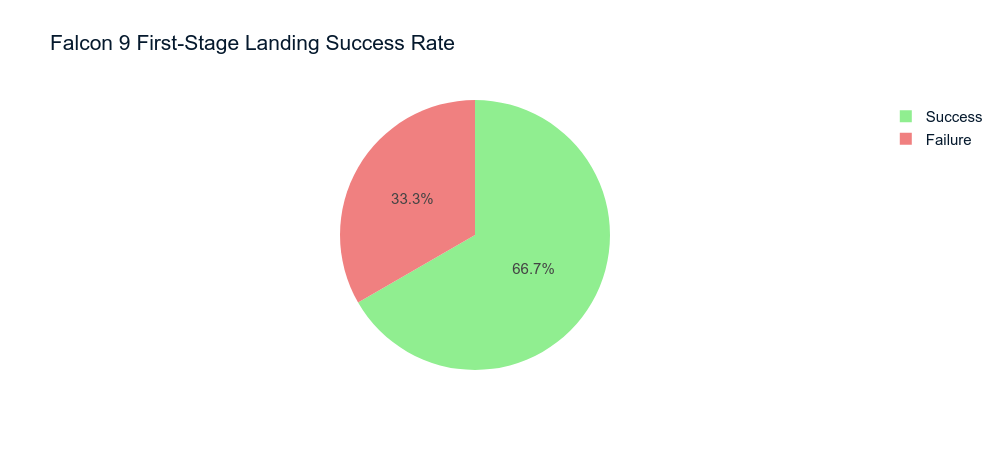

Falcon 9 First-Stage Landing Success Rate: 66.67%


In [2]:
# Calculate the success rate
success_rate = df['Class'].mean() * 100

# Plot the success rate with specified colors
fig = px.pie(names=['Success', 'Failure'], values=[success_rate, 100 - success_rate],
             title='Falcon 9 First-Stage Landing Success Rate',
             color_discrete_sequence=['lightgreen', 'lightcoral'])  # Green for success, Coral for failure
fig.update_layout(font=dict(size=15))  # Increase font size

# Save and display the plot 
fig.write_image("pictures/success_rates_pie.png", width=1000, height=450)
display(Image("pictures/success_rates_pie.png"))

# Print the success rate
print(f"Falcon 9 First-Stage Landing Success Rate: {success_rate:.2f}%")

The success rate of Falcon 9 first-stage landings is approximately `67%`. This means that about two-thirds of the landings have been successful. The pie chart visualization clearly shows the proportion of successful landings compared to failures, indicating a relatively high success rate for SpaceX's landing technology.

---

## How does the payload mass affect the landing success?

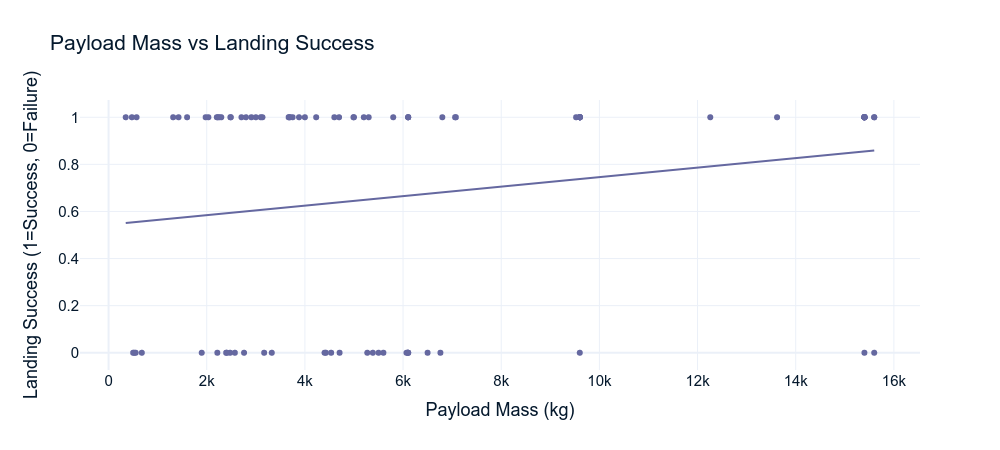

The correlation coefficient between Payload Mass and Landing Success is: 0.20


In [3]:
# Scatter plot of Payload Mass vs Landing Success
fig = px.scatter(df, x='PayloadMass', y='Class',
                 title='Payload Mass vs Landing Success',
                 labels={'PayloadMass': 'Payload Mass (kg)', 'Class': 'Landing Success (1=Success, 0=Failure)'},
                 trendline='ols')
fig.update_layout(font=dict(size=15))  # Increase font size

# Save and display the plot 
fig.write_image("pictures/success_rates_vs_payload_mass.png", width=1000, height=450)
display(Image("pictures/success_rates_vs_payload_mass.png"))

# Calculate and print the correlation coefficient
correlation = df['PayloadMass'].corr(df['Class'])
print(f"The correlation coefficient between Payload Mass and Landing Success is: {correlation:.2f}")

The scatter plot of Payload Mass vs. Landing Success shows the relationship between the payload mass and the success of Falcon 9 first-stage landings. The trendline indicates a slight positive correlation. The calculated correlation coefficient is approximately `0.20`, suggesting a weak positive relationship between payload mass and landing success. This implies that heavier payloads are slightly more likely to result in successful landings, but the effect is not strong.

---

## Which launch sites have the highest success rates?

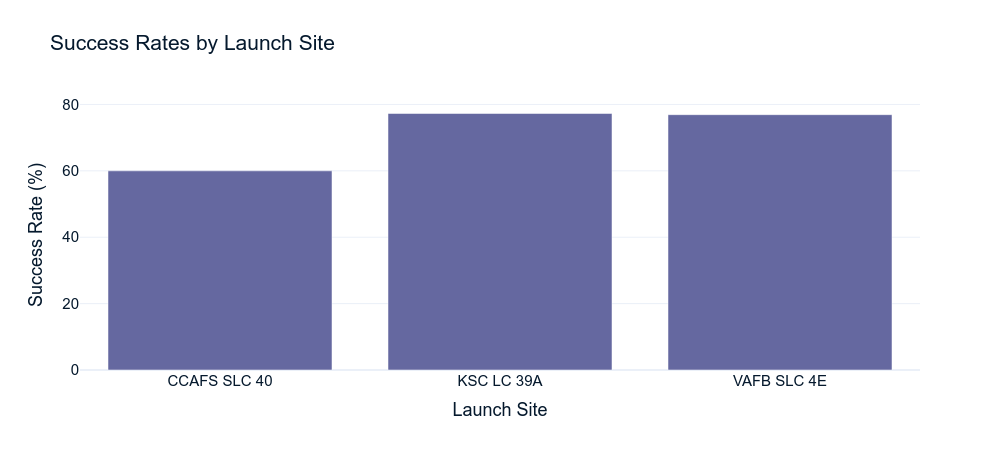

,LaunchSite,SuccessRate
1,KSC LC 39A,77.27
2,VAFB SLC 4E,76.92
0,CCAFS SLC 40,60.00


In [4]:
# Calculate success rates by launch site
success_rates = df.groupby('LaunchSite')['Class'].mean().reset_index()
success_rates['SuccessRate'] = (success_rates['Class'] * 100).round(2)

# Bar plot of success rates by launch site
fig = px.bar(success_rates, x='LaunchSite', y='SuccessRate',
             title='Success Rates by Launch Site',
             labels={'LaunchSite': 'Launch Site', 'SuccessRate': 'Success Rate (%)'})
fig.update_layout(font=dict(size=15))  # Increase font size

# Save and display the plot 
fig.write_image("pictures/success_rates_by_launch_site.png", width=1000, height=450)
display(Image("pictures/success_rates_by_launch_site.png"))

# Display the table of success rates by launch site
success_rates[['LaunchSite', 'SuccessRate']].sort_values(by='SuccessRate', ascending=False)

The analysis reveals that the Kennedy Space Center Launch Complex 39A (KSC LC 39A) has the highest success rate for Falcon 9 first-stage landings at approximately `77.3%`. This is closely followed by Vandenberg Air Force Base Space Launch Complex 4E (VAFB SLC 4E) with a success rate of about `76.9%`. The Cape Canaveral Air Force Station Space Launch Complex 40 (CCAFS SLC 40) has a lower success rate of `60.0%`. This indicates that KSC LC 39A and VAFB SLC 4E are the most reliable launch sites for successful landings.

---

## What is the trend of landing success over time?

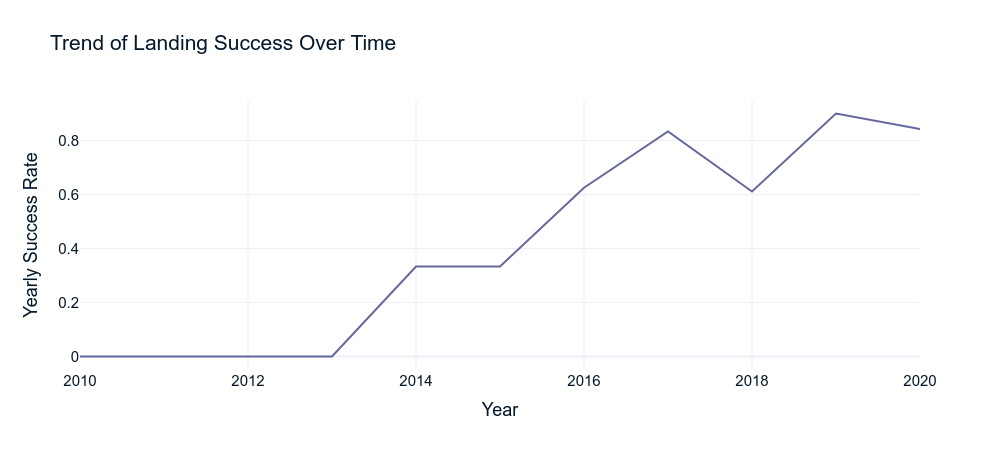

In [5]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by year and calculate the mean success rate
df['Year'] = df['Date'].dt.year
success_rate_yearly = df.groupby('Year')['Class'].mean().reset_index()

# Line plot of yearly success rate over time
fig = px.line(success_rate_yearly, x='Year', y='Class',
              title='Trend of Landing Success Over Time',
              labels={'Year': 'Year', 'Class': 'Yearly Success Rate'})
fig.update_layout(font=dict(size=15))  # Increase font size

# Save and display the plot 
fig.write_image("pictures/success_rates_over_time.png", width=1000, height=450)
display(Image("pictures/success_rates_over_time.png"))

The trend analysis of landing success over time reveals a general improvement in the success rate of Falcon 9 first-stage landings. By calculating the mean of the success rate, we observe that the success rate has increased steadily over the years. This indicates that SpaceX has been improving its landing technology and procedures, leading to more consistent and successful landings.

---

## Does the number of previous flights (reused boosters) affect the landing success?

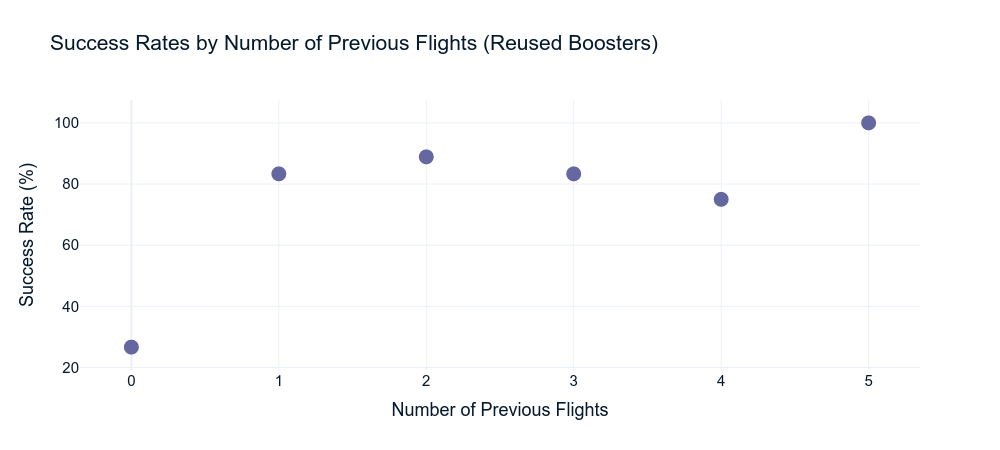

,ReusedCount,SuccessRate
0,0,26.67
1,1,83.33
2,2,88.89
3,3,83.33
4,4,75.00
5,5,100.00


In [6]:
# Calculate success rates by the number of previous flights (reused boosters)
reused_success_rates = df.groupby('ReusedCount')['Class'].mean().reset_index()
reused_success_rates['SuccessRate'] = (reused_success_rates['Class'] * 100).round(2)

# Scatter plot of success rates by the number of previous flights
fig = px.scatter(reused_success_rates, x='ReusedCount', y='SuccessRate',
                 title='Success Rates by Number of Previous Flights (Reused Boosters)',
                 labels={'ReusedCount': 'Number of Previous Flights', 'SuccessRate': 'Success Rate (%)'})
fig.update_layout(font=dict(size=15))  # Increase font size
fig.update_traces(marker=dict(size=15))  # Set the size of the points

# Save and display the plot 
fig.write_image("pictures/success_rates_by_reused_count.png", width=1000, height=450)
display(Image("pictures/success_rates_by_reused_count.png"))

# Display the table of success rates by the number of previous flights
reused_success_rates[['ReusedCount', 'SuccessRate']].sort_values(by='ReusedCount')

The analysis shows that the number of previous flights (reused boosters) positively affects the landing success rate. Boosters with no previous flights have a success rate of approximately `27%`, while those with one or more previous flights have significantly higher success rates, ranging from `75%` to `100%`. This indicates that reused boosters tend to have better landing success, likely due to improvements and refinements made during their refurbishment and reuse.

---

## How does the presence of grid fins affect the landing success?

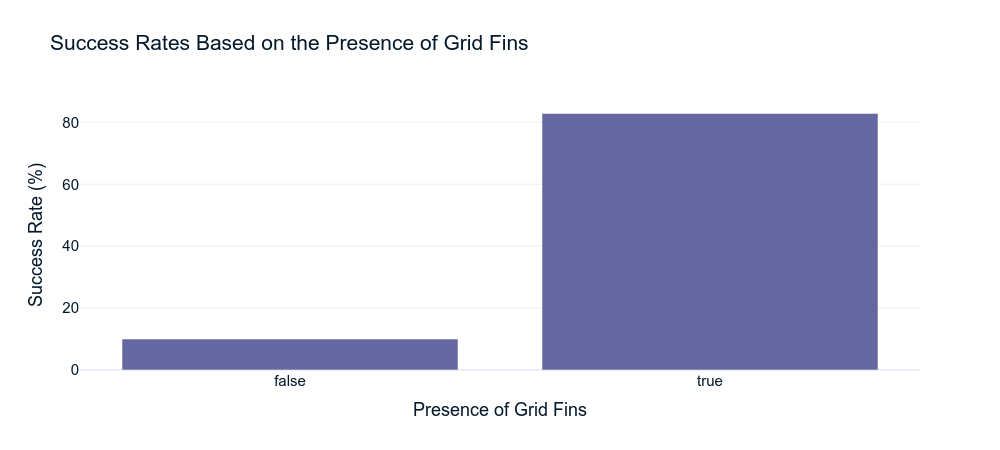

,GridFins,SuccessRate
0,False,10.00
1,True,82.86


In [7]:
# Calculate success rates based on the presence of grid fins
gridfins_success_rates = df.groupby('GridFins')['Class'].mean().reset_index()
gridfins_success_rates['SuccessRate'] = (gridfins_success_rates['Class'] * 100).round(2)

# Bar plot of success rates based on the presence of grid fins
fig = px.bar(gridfins_success_rates, x='GridFins', y='SuccessRate',
             title='Success Rates Based on the Presence of Grid Fins',
             labels={'GridFins': 'Presence of Grid Fins', 'SuccessRate': 'Success Rate (%)'})
fig.update_layout(font=dict(size=15))  # Increase font size

# Save and display the plot 
fig.write_image("pictures/success_rates_by_gridfins.png", width=1000, height=450)
display(Image("pictures/success_rates_by_gridfins.png"))

# Display the table of success rates based on the presence of grid fins
gridfins_success_rates[['GridFins', 'SuccessRate']]

The analysis reveals that the presence of grid fins significantly improves the landing success rate of Falcon 9 first-stage. Boosters equipped with grid fins have a success rate of approximately `83%`, compared to just `10%` for those without grid fins. This indicates that grid fins play a crucial role in enhancing the control and stability of the booster during landing, leading to higher success rates.

---

## How does the success rate of launches vary across different orbits?

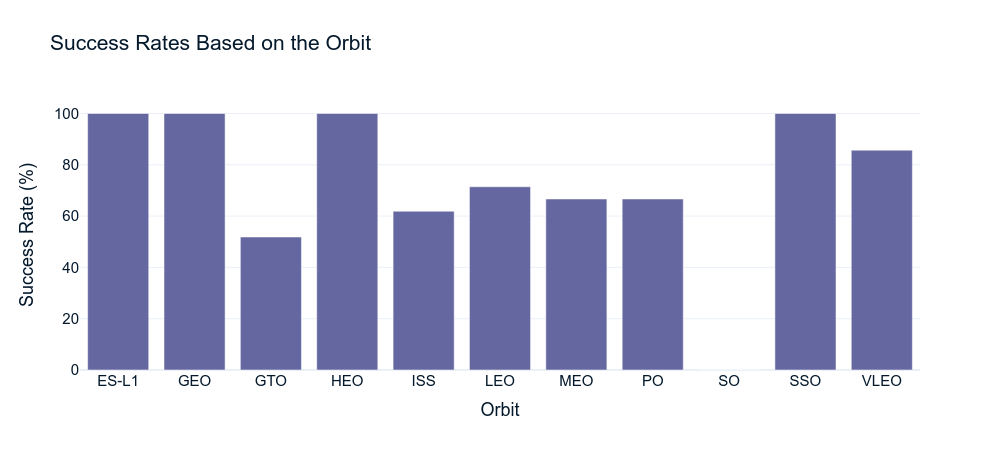

,Orbit,SuccessRate
0,ES-L1,100.00
1,GEO,100.00
3,HEO,100.00
9,SSO,100.00
10,VLEO,85.71
5,LEO,71.43
6,MEO,66.67
7,PO,66.67
4,ISS,61.90
2,GTO,51.85


In [8]:
# Calculate success rates based on the orbit
orbit_success_rates = df.groupby('Orbit')['Class'].mean().reset_index()
orbit_success_rates['SuccessRate'] = (orbit_success_rates['Class'] * 100).round(2)

# Bar plot of success rates based on the orbit
fig = px.bar(orbit_success_rates, x='Orbit', y='SuccessRate',
             title='Success Rates Based on the Orbit',
             labels={'Orbit': 'Orbit', 'SuccessRate': 'Success Rate (%)'})
fig.update_layout(font=dict(size=15))  # Increase font size

# Save and display the plot 
fig.write_image("pictures/success_rates_by_orbit.png", width=1000, height=450)
display(Image("pictures/success_rates_by_orbit.png"))

# Display the table of success rates based on the orbit
orbit_success_rates[['Orbit', 'SuccessRate']].sort_values('SuccessRate', ascending=False)

The analysis shows that the success rate of SpaceX Falcon 9 first-stage landings varies significantly across different orbits. Orbits such as ES-L1, GEO, HEO, and SSO have a perfect success rate of `100%`. In contrast, the GTO orbit has a lower success rate of approximately `52%`, and the SO orbit has a 0% success rate. Other orbits like LEO, MEO, and PO have moderate success rates ranging from `67%` to `71%`. This indicates that certain orbits are more challenging to achieve successful landings.

---